## Simple Liner Regression

#### Step 1. Reading and Understanding the data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model buildling
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
adv = pd.read_csv("advertising.csv")

In [4]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Goal is to build the regression model to see the which of the variable is more effective for the number of sale

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Visualize

<Axes: >

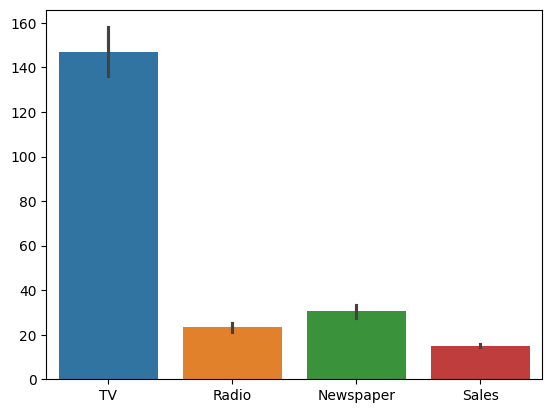

In [7]:
sns.barplot(data=adv)

<Axes: xlabel='TV', ylabel='Sales'>

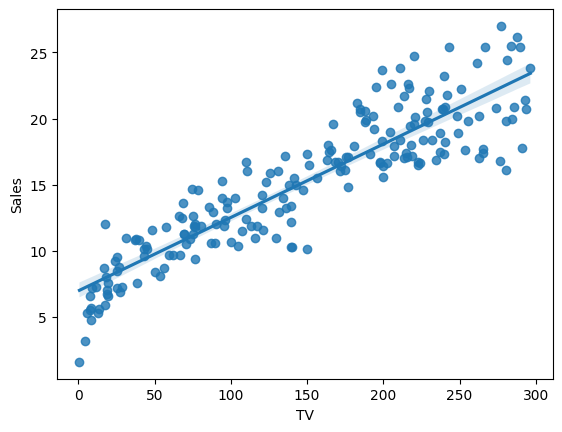

In [8]:
sns.set_color_codes="Black"
sns.regplot(data=adv, x='TV', y="Sales")

<Axes: xlabel='Radio', ylabel='Sales'>

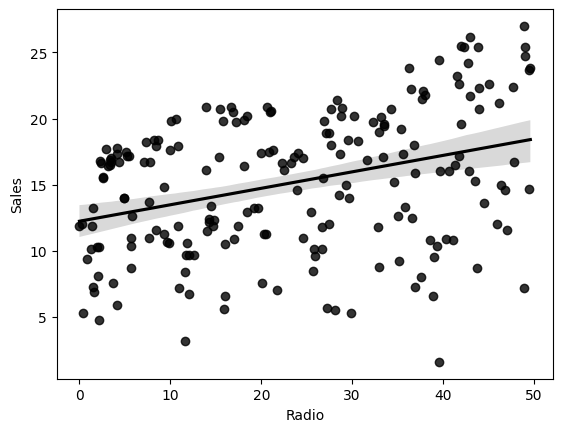

In [9]:
sns.regplot(data=adv, x='Radio', y="Sales", color="Black")

<Axes: xlabel='Newspaper', ylabel='Sales'>

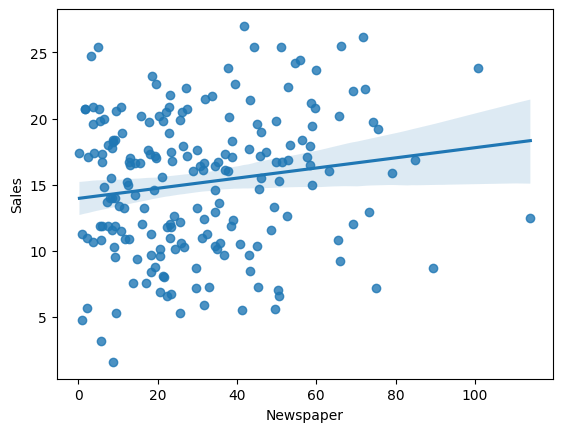

In [10]:
sns.regplot(data=adv, x='Newspaper', y='Sales' )

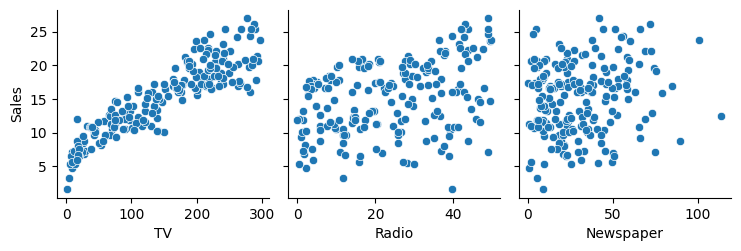

In [11]:
sns.pairplot(data=adv, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales")
plt.show()

In [12]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


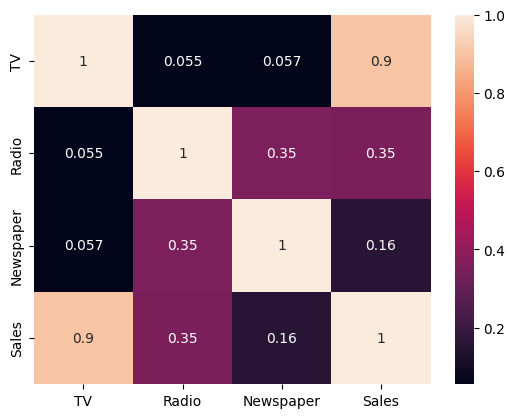

In [13]:
sns.heatmap(adv.corr(), annot=True)
plt.show()

#### Building a Linear Model 

Using statmodel library


Steps
- Create x and y
- Create train and test sets (70 -30, 80-20)
- Train your model on the training set (i.e learn the coefficients)
- Evalute the model (training set, test set) 

In [14]:
# Create x and y

X = adv["TV"]
y = adv["Sales"]


In [15]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [16]:
X_train.shape

(140,)

In [17]:
X_test.shape

(60,)

In [18]:
y_test.shape

(60,)

In [19]:
y_train.shape

(140,)

In [20]:
# training the model


In [21]:
# adding constant

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [22]:
# fittign the model 
#OLS  ordinary least square

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.52e-52
Time:                        22:30:57   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SKlearn


In [28]:
# train test split

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Steps in sklearn model building


 - Create an object of linear regression
 - fir the model
 - see the params, make predicitions (train, test)
 - evaluate (r2, etc)

In [33]:
# create an obejct
lm = LinearRegression()

In [34]:
X_train.shape

(140,)

In [42]:
# reshape X_train to (n ,1)
X_train_lm = X_train.values.reshape(-1, 1)
print(X_train_lm.shape)
X_test_lm = X_test.values.reshape(-1, 1)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [44]:
# fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [ ]:
help(lm)

In [46]:
print(lm.coef_)

[0.05454575]


In [47]:
print(lm.intercept_)

6.948683200001362


In [49]:
#make predicition
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [50]:
# evalue the model

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566
